In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7.5,7.5]

In [6]:
def compute_mean(x,d,k):                #helperfunction to compute cluster means(used in all the follwing subparts)
    l=[]
    for i in range(k):
        a=np.mean(x,axis=1,where=x[d-1]==i+1)[:d-1] 
        a[np.isnan(a)]=0                                    #handling empty slice and true dvide warnings
        l.append(a)                             

    return np.array(l)

x=np.genfromtxt("Dataset.csv",delimiter=',').transpose()            
dim,n=x.shape                                                   #loading data

Random Initialisation :1


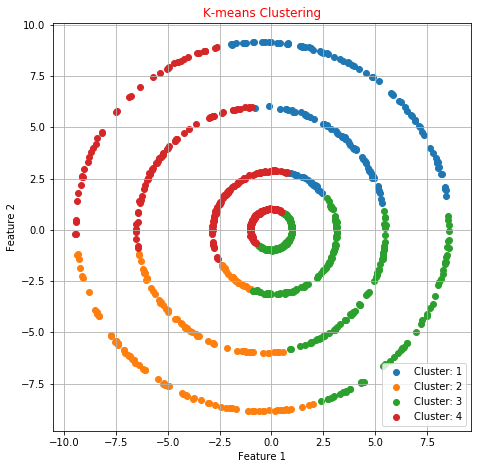

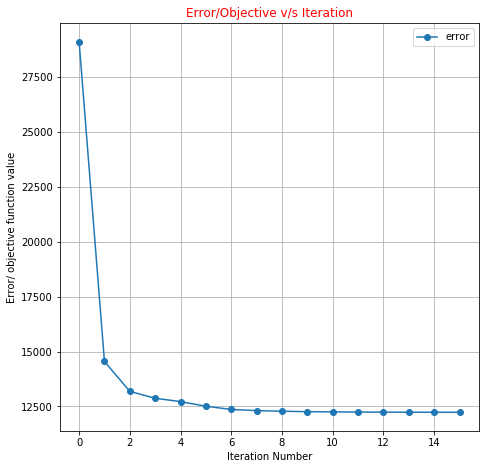

Random Initialisation :2


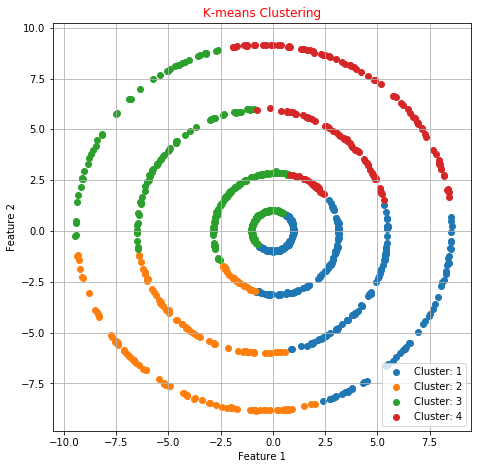

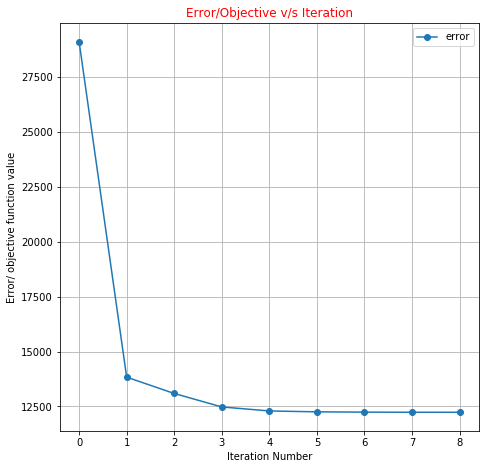

Random Initialisation :3


c:\users\muhilan\python\python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\muhilan\python\python37\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


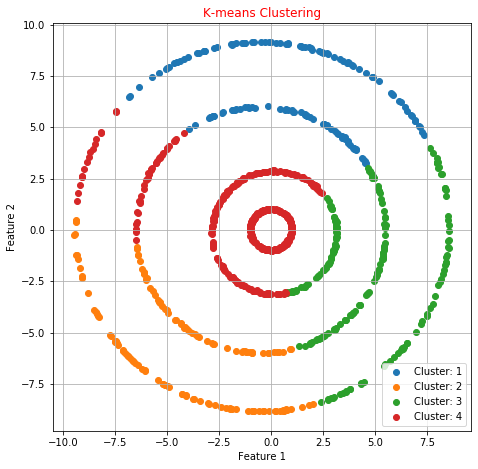

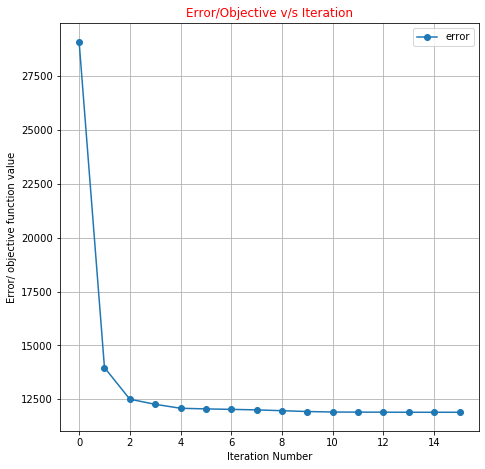

Random Initialisation :4


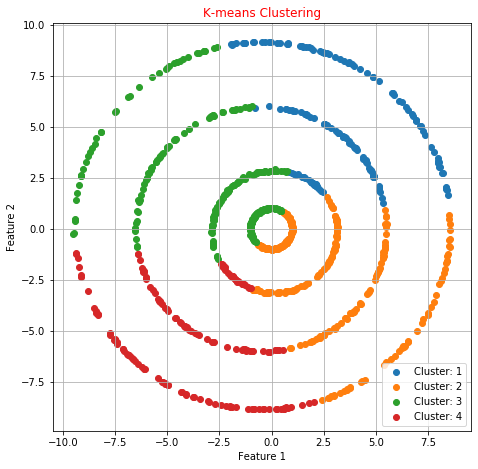

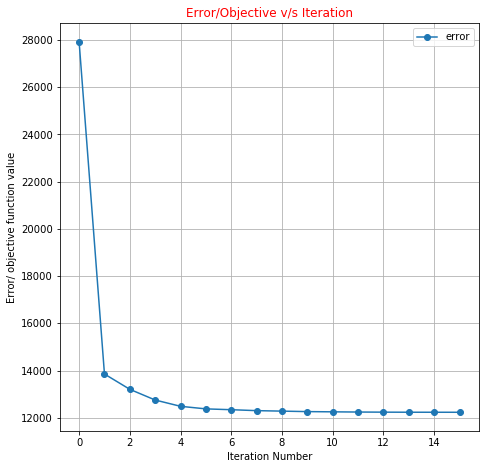

Random Initialisation :5


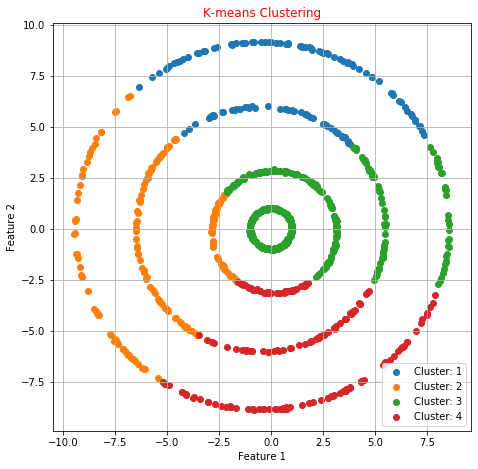

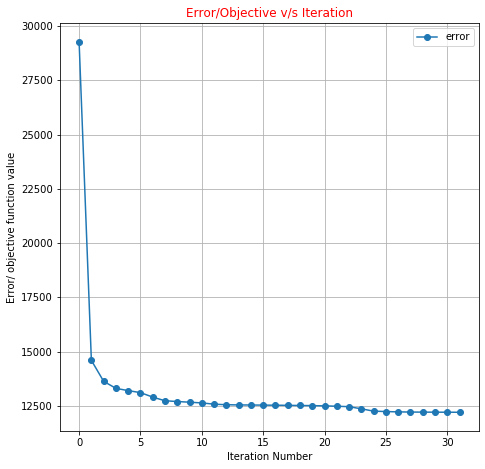

In [7]:
k=4                                                                   # k defines the number of clusters
for j in range(5):                                     #loop for 5 different initialisation
    print("Random Initialisation :%s" %(j+1))
    #start of Llyod's/k-means algorithm
    z=np.random.choice(np.arange(k)+1,n)              #z:randomly generating cluster indicator value for datapoints
    x_clus=np.vstack((x,z))
    dim,n=x_clus.shape
    
    error=[]
    
    done=False
    while(not(done)):                                   # loop terminates after no reassignment takes place
        clu_mean=compute_mean(x_clus,dim,k)
        done=True
        for i in range(n):
            dist=np.linalg.norm(x_clus[:dim-1,i]-clu_mean,axis=1)   #checking for min distance from cluster means
            min_pos=(list(dist).index(min(dist)))+1
            if min_pos!=x_clus[dim-1,i]:
                x_clus[dim-1,i]=min_pos                           #reassignment step
                done=False
        err= np.sum(np.linalg.norm(x_clus[:dim-1].transpose()-clu_mean[(x_clus[dim-1]-1).astype("int64")],axis=1)**2,axis=0)
        error.append(err)                                         #noting the error/ objectve function value at each iter
                                                                     
    for i in range(k):
        plt.scatter(x_clus[0][x_clus[dim-1]==i+1],x_clus[1][x_clus[dim-1]==i+1])  #plot points based on final cluster
    
    plt.legend(["Cluster: " + str(x) for x in range(1,k+1)], loc ="lower right")
    plt.title("K-means Clustering",color="red")
    plt.grid("True")
    plt.xlabel("Feature 1")                                         # Feature1-first component of  each data point
    plt.ylabel("Feature 2")                                        # Feature2-second component of  each data point
    plt.show()
    
    plt.title("Error/Objective v/s Iteration",color="red")
    plt.grid("True")
    plt.xlabel("Iteration Number")                             
    plt.ylabel("Error/ objective function value")                                 
    plt.plot(error,"-",marker="o",label="error")
    plt.legend()
    plt.show()

In [14]:
from scipy.spatial import Voronoi,voronoi_plot_2d

In [15]:
xmin=min(x[0])-1
xmax=max(x[0])+1                                    # range for plotting the regions
ymin=min(x[1])-1
ymax=max(x[1])+1


def slope_point(a):                                 #calclculating the perpendicular bisector slope and the point
    
    slope_of_bis=-1*(a[0]-a[1])[0]/(a[0]-a[1])[1]
    mid=np.mean(a,axis=0)
    plot_lines.append(np.array([slope_of_bis,mid[0],mid[1]])) 
    
def intersection():                 #function to determine the intersection of perpendicular bisectos
    if len(plot_lines)==1:
        return[]
    
    else:
         x_coord=((plot_lines[0][0]*plot_lines[0][1]- plot_lines[1][0]*plot_lines[1][1])-(plot_lines[0][2]-plot_lines[1][2]))/(plot_lines[0][0]-plot_lines[1][0])
        
         return [round(x_coord,2)]
        
def plot_region():                 #function to plot the voronoi based on number of cluster mean points
    inter=intersection()
    if len(inter)==0:
        plx=np.arange(xmin,xmax,0.1)
        ply=(plx-plot_lines[0][1])*plot_lines[0][0] + plot_lines[0][2]
        

        plt.plot(plx,ply,"red")
        plt.xlim([xmin,xmax])
        plt.ylim([ymin,ymax])
        plt.show()
    
    if len(inter)==1:
        for i in range(len(plot_lines)):
            if plot_lines[i][1]>inter[0]:
                
                plx=np.arange(inter[0],xmax,0.1)
                ply=(plx-plot_lines[i][1])*plot_lines[i][0] + plot_lines[i][2]
                
                plt.plot(plx,ply,"red")
            else:
                plx=np.arange(xmin,inter[0],0.1)
                ply=(plx-plot_lines[i][1])*plot_lines[i][0] + plot_lines[i][2]
                plt.plot(plx,ply,"red")
        plt.xlim([xmin,xmax]) 
        plt.ylim([ymin,ymax])
        plt.show()  

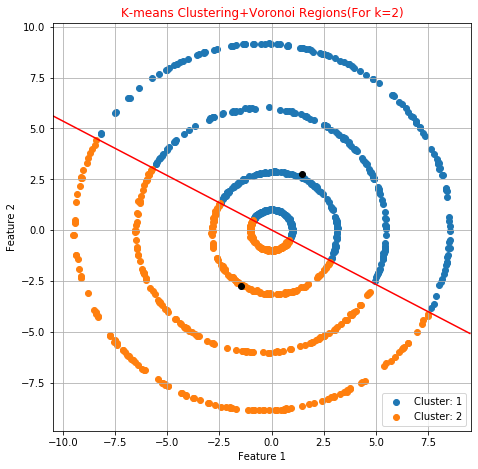

c:\users\muhilan\python\python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\muhilan\python\python37\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


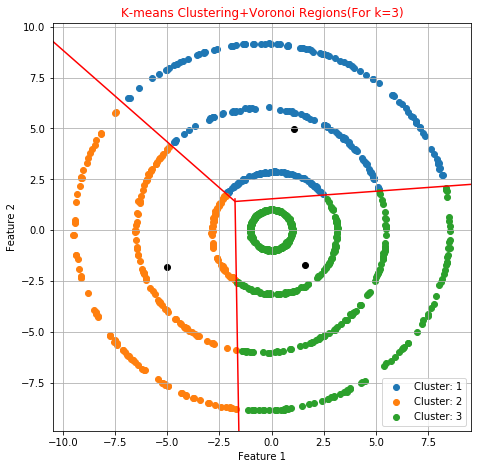

c:\users\muhilan\python\python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\muhilan\python\python37\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


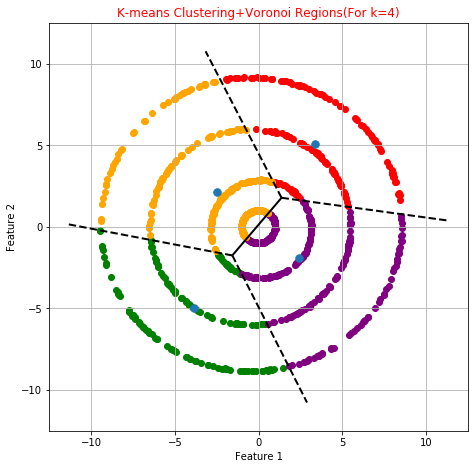

c:\users\muhilan\python\python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\muhilan\python\python37\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


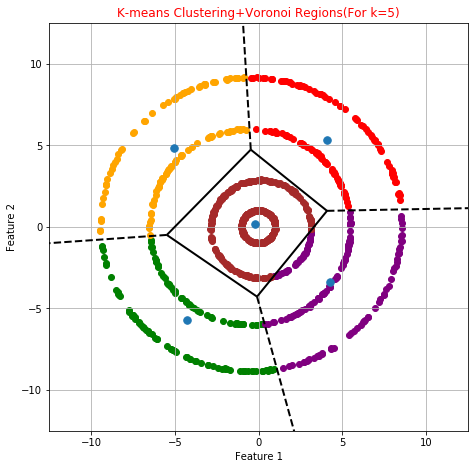

In [16]:
dim,n=x.shape
z=np.random.choice(np.arange(2)+1,n)            #fixing a random assignment(involving only two clusters initially)
for k in range(2,6):
    
    x_clus=np.vstack((x,z))
    dim,n=x_clus.shape
    #start of Lloyd's Algorithm/K-means
    done=False
    while(not(done)):                            #loop terminants when no reassignment takes place
        clu_mean=compute_mean(x_clus,dim,k)
        done=True
        for i in range(n):
            dist=np.linalg.norm(x_clus[:dim-1,i]-clu_mean,axis=1)
            min_pos=(list(dist).index(min(dist)))+1
            if min_pos!=x_clus[dim-1,i]:
                x_clus[dim-1,i]=min_pos
                done=False
    if k<=3:    
        plt.title("K-means Clustering+Voronoi Regions(For k=%s)"%k,color="red")
        plt.grid("True")
        plt.xlabel("Feature 1")                                         # Feature1-first component of  each data point
        plt.ylabel("Feature 2")                                         # Feature2-second component of  each data point
        
        #plotting the datapoints and their cluster mean
        for i in range(k):
            plt.scatter(x_clus[0][x_clus[dim-1]==i+1],x_clus[1][x_clus[dim-1]==i+1])
        plt.legend(["Cluster: " + str(x) for x in range(1,k+1)], loc ="lower right")
        plt.scatter(clu_mean[:,0],clu_mean[:,1],color="black")
                                                             
        
        plot_lines=[]                                          #plot_lines:list of perp_bisectors to be plotted
        for i in range(len(clu_mean)-1):
            for j in range(i+1,len(clu_mean)):                      
                slope_point(np.array([clu_mean[i],clu_mean[j]]))
        plot_region()
        
    else:
        #clu_mean array/matrix now holds the final clu_means
        vor=Voronoi(clu_mean)
        fig=voronoi_plot_2d(vor,show_vertices=False,line_colors="black",line_width=2,point_size=15,point_color="black")
        color_code=["red","green","purple","orange","brown"]
        for i in range(k):
            plt.scatter(x_clus[0][x_clus[dim-1]==i+1],x_clus[1][x_clus[dim-1]==i+1],color=color_code[i])
        plt.title("K-means Clustering+Voronoi Regions(For k=%s)"%k,color="red")
        plt.grid("True")
        plt.xlim([-12.5,12.5])
        plt.ylim([-12.5,12.5])
        plt.xlabel("Feature 1")                                         # Feature1-first component of  each data point
        plt.ylabel("Feature 2")                                         # Feature2-second component of each data point
        plt.show()         

iii)

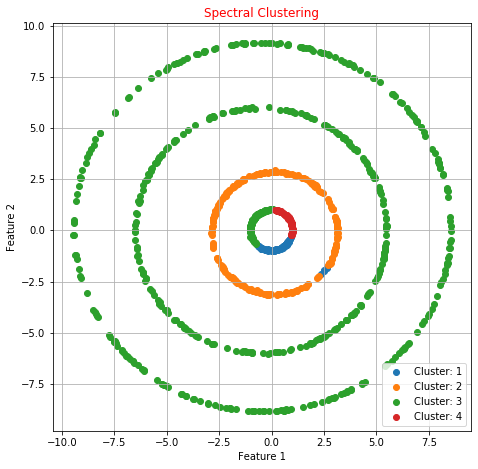

In [17]:
#RBF with sigma=0.07 chosen as kernel function
k=4                                                    #k: no of clusters
kernel=np.empty((n,n))
for i in range(n):                                       #creating the Kernel matrix
    kernel[i]=np.exp(-0.5*((np.linalg.norm(x.transpose()[i]-x.transpose(),axis=1))**2)/(0.07
                                                                                        **2))
    
#start of spectral clustering
a,b=np.linalg.eigh(kernel)
k_eigenvectors=b.transpose()[::-1][:k]          # "H" matrix is the transpose of the k_eigenvectors matrix
dim,n=k_eigenvectors.shape

for i in range(n):                              # Normalizing the rows of H eqivalentlythe columns of k_eigenvectors 
    if (k_eigenvectors[:,i]==np.zeros(dim)).all():
        pass
    else:
        if(np.linalg.norm(k_eigenvectors[:,i])!=0):
            k_eigenvectors[:,i]=k_eigenvectors[:,i]/np.linalg.norm(k_eigenvectors[:,i])
        else:

            k_eigenvectors[:,i]=(10**160) * k_eigenvectors[:,i]
            k_eigenvectors[:,i]=k_eigenvectors[:,i]/np.linalg.norm(k_eigenvectors[:,i])
                
 #k-means ++ on the columns of k_eigenvectors (considering them as new datapoints)
z=np.zeros(n)                 
means=np.empty((k,k))  
score=np.empty(n)
m1=np.random.choice(n)                      #randomly choosing first mean from the new data  
means[0]=k_eigenvectors[:,m1]

for l in range(1,k):
    for i in range(n):
        score[i]=min(np.linalg.norm(k_eigenvectors[:,i]-means[:l],axis=1))   #assigning scores to each datapoint
    mnext=np.random.choice(n,p=score/np.sum(score))          
    means[l]=k_eigenvectors[:,mnext]                #choosing subsequent means randomly based on the scores computed

new_clus=np.vstack((k_eigenvectors,z))
dim,n=new_clus.shape

done=False
while(not(done)):                           #loop terminates after no reassignment of points occur
    done=True
    for i in range(n):
        dist=np.linalg.norm(new_clus[:dim-1,i]-means,axis=1)
        min_pos=(list(dist).index(min(dist)))+1
        if min_pos!=new_clus[dim-1,i]:
            new_clus[dim-1,i]=min_pos
            done=False
    means=compute_mean(new_clus,dim,k)

xwithclus=np.vstack((x,new_clus[dim-1]))          #appending the cluster indicators to the orignal data
dim,n=xwithclus.shape

plt.title("Spectral Clustering",color="red")
plt.grid("True")
plt.xlabel("Feature 1")                                        # Feature1-first component of  each data point
plt.ylabel("Feature 2")                                        # Feature2-second component of  each data point
for i in range(k):
    plt.scatter(xwithclus[0][xwithclus[dim-1]==i+1],xwithclus[1][xwithclus[dim-1]==i+1])
plt.legend(["Cluster: " + str(x) for x in range(1,k+1)], loc ="lower right")
plt.show()

iv)

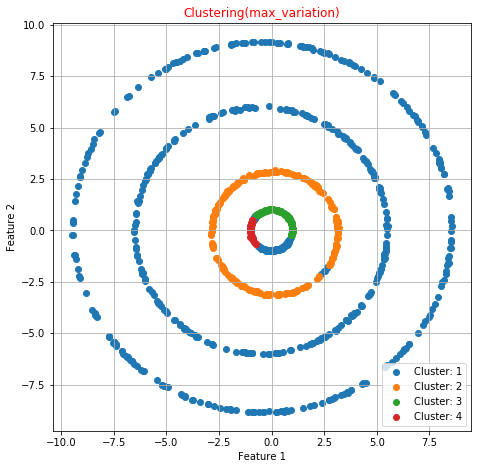

In [18]:
#Variant of the previous algorithm
k=4                                                        #k: number of clusters
kernel=np.empty((n,n))
for i in range(n):                                         #creating kernel matrix,RBF with sigma=0.07
    kernel[i]=np.exp(-1*((np.linalg.norm(x.transpose()[i]-x.transpose(),axis=1))**2)/(2*(0.07**2)))

a,b=np.linalg.eigh(kernel)
k_eigenvectors=b.transpose()[::-1][:k]                # "H" matrix is the transpose of the k_eigenvectors matrix

dim,n=k_eigenvectors.shape

z=np.empty(n)
for i in range(n):
    l=list(k_eigenvectors[:,i]) #cluster assignment based on position of max in the columns of k_eigenvectors matrix
    max_pos=l.index(max(l))+1
    z[i]=max_pos
           
xwithclus=np.vstack((x,z))  #appending the cluster assignment to the data
dim,n=xwithclus.shape

plt.title("Clustering(max_variation)",color="red")
plt.grid("True")
plt.xlabel("Feature 1")                                        # Feature1-first component of  each data point
plt.ylabel("Feature 2")                                        # Feature2-second component of  each data point
for i in range(k):
    plt.scatter(xwithclus[0][xwithclus[dim-1]==i+1],xwithclus[1][xwithclus[dim-1]==i+1])
plt.legend(["Cluster: " + str(x) for x in range(1,k+1)], loc ="lower right")
plt.show()